In [40]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#**Problema de Classificação** - Naive Bayes

## Prever os votos em Republicanos e Democratas (Utilizar Variável Class)

In [0]:
%%R
# Import
install.packages("mlbench")
library(mlbench)

# Carregando o dataset
#?HouseVotes84
data("HouseVotes84")

## Análise Exploratória de Dados

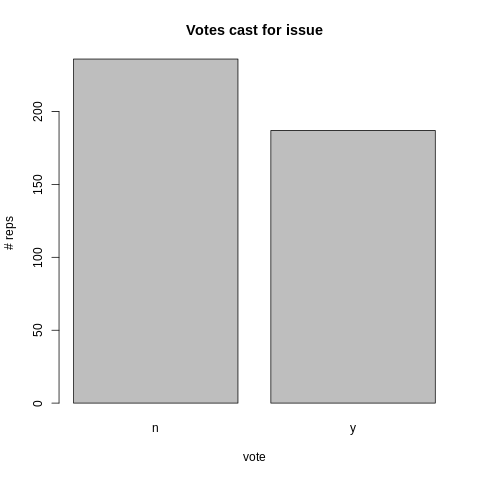

In [42]:
%%R
plot(as.factor(HouseVotes84[,2]))
title(main = "Votes cast for issue", xlab = "vote", ylab = "# reps")

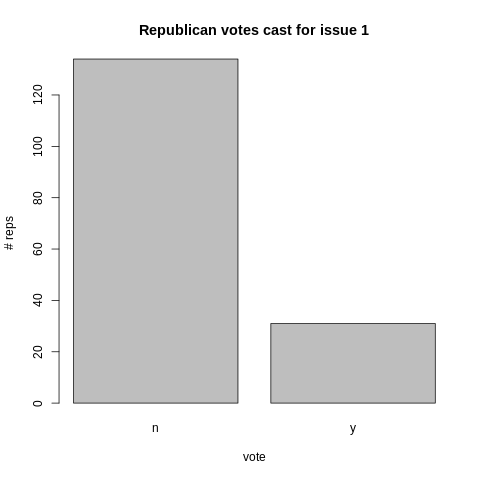

In [43]:
%%R
plot(as.factor(HouseVotes84[HouseVotes84$Class == 'republican', 2]))
title(main = "Republican votes cast for issue 1", xlab = "vote", ylab = "# reps")

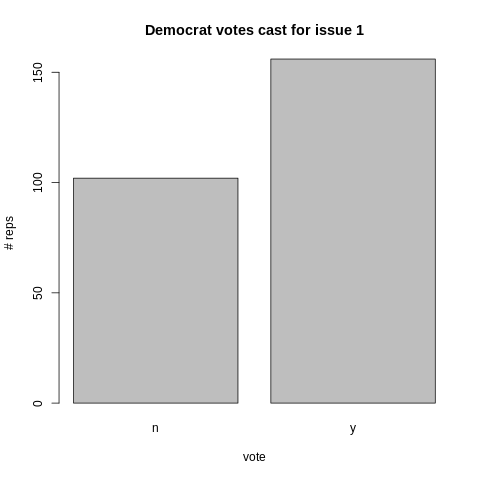

In [44]:
%%R
plot(as.factor(HouseVotes84[HouseVotes84$Class == 'democrat',2]))
title(main = "Democrat votes cast for issue 1", xlab = "vote", ylab = "# reps")

#Funções usadas para Imputation

## Função que retorna o numeros de NA's por voto e classe (democrat or republican)


In [0]:
%%R
na_by_col_class <- function (col,cls){return(sum(is.na(HouseVotes84[,col]) & HouseVotes84$Class==cls))}

## Função para retoranar a soma entre os dados de democratas quanto de republicanos

In [0]:
%%R
p_y_col_class <- function(col,cls){
  sum_y <- sum(HouseVotes84[,col] == 'y' & HouseVotes84$Class == cls, na.rm = TRUE)
  sum_n <- sum(HouseVotes84[,col] == 'n' & HouseVotes84$Class == cls, na.rm = TRUE)
  return(sum_y/(sum_y+sum_n))}

## Testando a função

In [47]:
%%R
p_y_col_class(2,'democrat')

[1] 0.6046512


In [48]:
%%R
p_y_col_class(2,'republican')

[1] 0.1878788


In [49]:
%%R
na_by_col_class(2,'democrat')

[1] 9


In [50]:
%%R
na_by_col_class(2,'republican')

[1] 3


## Aplicar conceito de Imputação - Técnica de substituição de NAs

In [0]:
%%R
for (i in 2:ncol(HouseVotes84)) {
  if(sum(is.na(HouseVotes84[,i])>0)) { #verificando se temos ou não valores missing
    c1 <- which(is.na(HouseVotes84[,i]) & HouseVotes84$Class == 'democrat',arr.ind = TRUE)   #missing de democratas
    c2 <- which(is.na(HouseVotes84[,i]) & HouseVotes84$Class == 'republican',arr.ind = TRUE) #missing de republicanos
    HouseVotes84[c1,i] <- ifelse(runif(na_by_col_class(i,'democrat'))<p_y_col_class(i,'democrat'),'y','n') # aplicando função de remoção de missing para C1
    HouseVotes84[c2,i] <- ifelse(runif(na_by_col_class(i,'republican'))<p_y_col_class(i,'republican'),'y','n')} # aplicando função de remoção de missing para C2
}

---

## Concluida essa etapa de Pré-Processamento de dados, iniciar a **Construção do Modelo**

##**Fazer a divisão entre Dados de Treino e Dados de Teste**

In [0]:
%%R
HouseVotes84[,"train"] <- ifelse(runif(nrow(HouseVotes84)) < 0.80,1,0) #.80 como índice de separação 

## Criar Index para fazer a divisão entre os Dados

In [0]:
%%R
trainColNum <- grep("train",names(HouseVotes84)) 

##Divisão com **Index** criado 


In [0]:
%%R
# Gerando os dados de treino e de teste a partir da coluna de treino
trainHouseVotes84 <- HouseVotes84[HouseVotes84$train == 1, -trainColNum] #dados Treino 1
testHouseVotes84 <- HouseVotes84[HouseVotes84$train == 0, -trainColNum]  #dados Teste 0

---

# Invocar Método **NaiveBayes** - Algoritmo Probabilístico

In [0]:
%%R
install.packages("e1071") #pacote para NaiveBayes
library(e1071)

#**Criando Modelo NaiveBayes**

In [0]:
%%R
# Treinar o modelo
#?naiveBayes
nb_model <- naiveBayes(Class ~ ., data = trainHouseVotes84)

In [57]:
%%R
# Visualizar o resultado
nb_model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  democrat republican 
 0.6111111  0.3888889 

Conditional probabilities:
            V1
Y                    n         y
  democrat   0.4066986 0.5933014
  republican 0.8195489 0.1804511

            V2
Y                    n         y
  democrat   0.4928230 0.5071770
  republican 0.5037594 0.4962406

            V3
Y                    n         y
  democrat   0.1196172 0.8803828
  republican 0.8571429 0.1428571

            V4
Y                     n          y
  democrat   0.94736842 0.05263158
  republican 0.01503759 0.98496241

            V5
Y                     n          y
  democrat   0.78947368 0.21052632
  republican 0.03759398 0.96240602

            V6
Y                     n          y
  democrat   0.50717703 0.49282297
  republican 0.09022556 0.90977444

            V7
Y                    n         y
  democrat   0.2440191 0.7559809
  r

In [58]:
%%R
summary(nb_model)

          Length Class  Mode     
apriori    2     table  numeric  
tables    16     -none- list     
levels     2     -none- character
isnumeric 16     -none- logical  
call       4     -none- call     


In [0]:
%%R
str(nb_model)

## Realizar as Previsões com Dados de Teste

In [0]:
%%R
# Fazer as Previsões
nb_test_predict <- predict(nb_model, testHouseVotes84[,-1]) # predict(modelo, dados de teste)

## Criar Matriz de confusão - Tabela de Comparação (Previsão x Acerto)

In [87]:
%%R
# Criar Confusion matrix
table(pred = nb_test_predict, true = testHouseVotes84$Class) 

            true
pred         democrat republican
  democrat         54          3
  republican        4         32


In [88]:
%%R
# Média - percentual de acerto do modelo
mean(nb_test_predict == testHouseVotes84$Class)

[1] 0.9247312


#**Programação**
## Função para executar o registrar todos os resultados do modelo - Bônus

In [0]:
%%R
# Função para executar o registrar todos os resultados do modelo
nb_multiple_runs <- function(train_fraction, n) {
  fraction_correct <- rep(NA,n)
  for (i in 1:n) {
    HouseVotes84[,"train"] <- ifelse(runif(nrow(HouseVotes84))<train_fraction,1,0)
    trainColNum <- grep("train", names(HouseVotes84))
    trainHouseVotes84 <- HouseVotes84[HouseVotes84$train == 1,-trainColNum]
    testHouseVotes84 <- HouseVotes84[HouseVotes84$train == 0,-trainColNum]
    nb_model <- naiveBayes(Class ~ ., data = trainHouseVotes84)
    nb_test_predict <- predict(nb_model, testHouseVotes84[,-1])
    fraction_correct[i] <- mean(nb_test_predict == testHouseVotes84$Class)
  }
  return(fraction_correct)
}

## Podemos executar o Modelo diversas vezes e comparar seus resultados

In [90]:
%%R
# Executando o modelo 20 vezes
fraction_correct_predictions <- nb_multiple_runs(0.8, 20)
fraction_correct_predictions

 [1] 0.8988764 0.9340659 0.9325843 0.9204545 0.9111111 0.8989899 0.9382716
 [8] 0.9036145 0.9318182 0.9270833 0.9354839 0.9506173 0.8965517 0.8958333
[15] 0.9438202 0.9146341 0.9278351 0.8961039 0.9183673 0.8684211


In [91]:
%%R
# Resumo dos resultados
summary(fraction_correct_predictions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8684  0.8990  0.9194  0.9172  0.9330  0.9506 


In [92]:
%%R
# Desvio padrão
sd(fraction_correct_predictions)

[1] 0.02072898


## NaiveBayes trabalha com aleatoriadade, a teoria das probabilidades. Ao executar 20 vezes, temos chance de pegar modelos ainda mais precisos, assim como modelos inferiores. 

## Uma boa prática é fazer várias execuções e depois pegar o modelo com melhor nível de performance. Neste caso todas as versões ficaram entre 0.88 e 0.95


In [0]:
# Os resultados das execuções estão bem próximos, entre 0.86 e 0.95, 
# com um desvio padrão de 0.02.
# O Naive Bayes fez um bom trabalho com este conjunto de dados

---

# Titanic -  prever uma classificação (sobreviventes e não sobreviventes)


In [76]:
%%R
# Comecamos carregando o dataset de dados_treino
dados_treino <- read.csv('titanic-train.csv')
head(dados_treino)

  PassengerId Survived Pclass
1           1        0      3
2           2        1      1
3           3        1      3
4           4        1      1
5           5        0      3
6           6        0      3
                                                 Name    Sex Age SibSp Parch
1                             Braund, Mr. Owen Harris   male  22     1     0
2 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female  38     1     0
3                              Heikkinen, Miss. Laina female  26     0     0
4        Futrelle, Mrs. Jacques Heath (Lily May Peel) female  35     1     0
5                            Allen, Mr. William Henry   male  35     0     0
6                                    Moran, Mr. James   male  NA     0     0
            Ticket    Fare Cabin Embarked
1        A/5 21171  7.2500              S
2         PC 17599 71.2833   C85        C
3 STON/O2. 3101282  7.9250              S
4           113803 53.1000  C123        S
5           373450  8.0500              S

## Análise Exploratória de Dados

### Vamos usar o pacote Amelia e suas funções para definir o volume de dados Missing


In [0]:
%%R
install.packages("Amelia")
library(Amelia)

## Função para Mapeamento de valores Missing

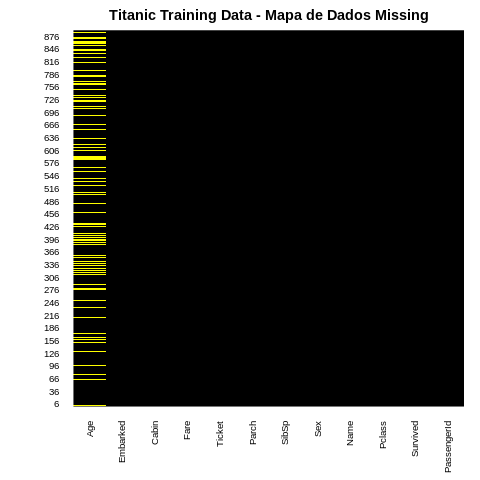

In [77]:
%%R
#?missmap 
missmap(dados_treino, #dataset
        main = "Titanic Training Data - Mapa de Dados Missing", #título
        col = c("yellow", "black"), #cores
        legend = FALSE) #desabilitar legenda


Valores missing em Age

## Visualizando Dados

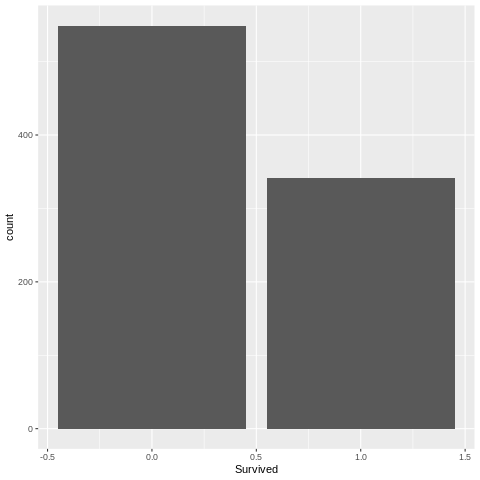

In [78]:
%%R 
library(ggplot2) # 0 não sobreviveu, 1 sobreviveu
ggplot(dados_treino,aes(Survived)) + geom_bar()

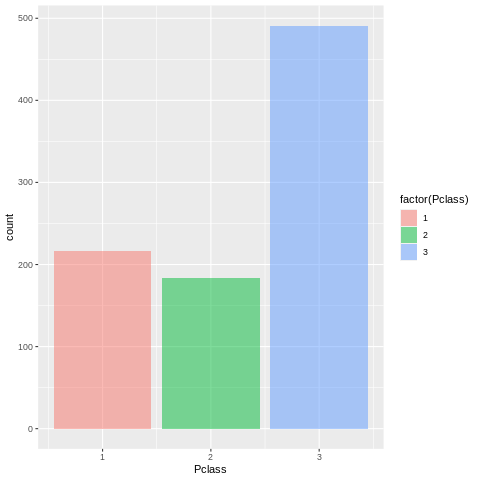

In [79]:
%%R 
# pclass indica a classe do passageiro
ggplot(dados_treino,aes(Pclass)) + geom_bar(aes(fill = factor(Pclass)), alpha = 0.5)

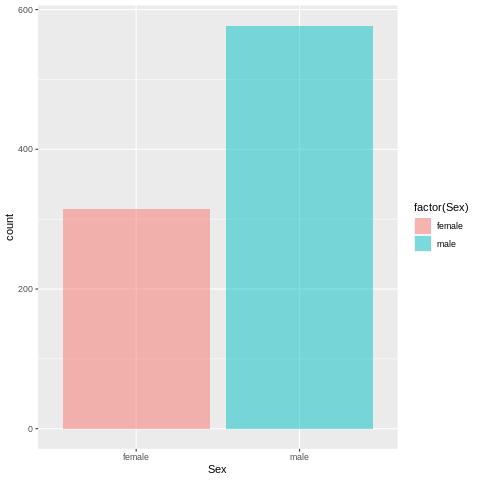

In [80]:
%%R
ggplot(dados_treino,aes(Sex)) + geom_bar(aes(fill = factor(Sex)), alpha = 0.5)

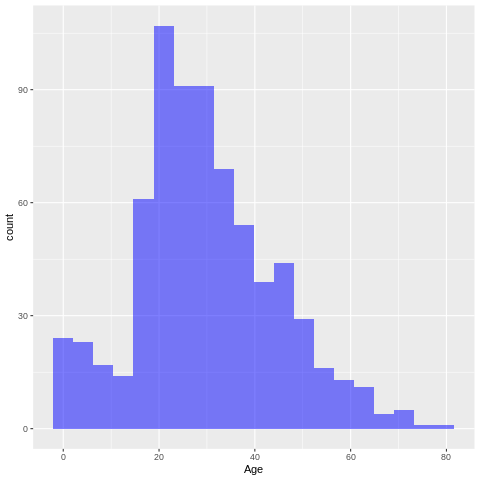

In [81]:
%%R
# faixa de idade
ggplot(dados_treino,aes(Age)) + geom_histogram(fill = 'blue', bins = 20, alpha = 0.5)

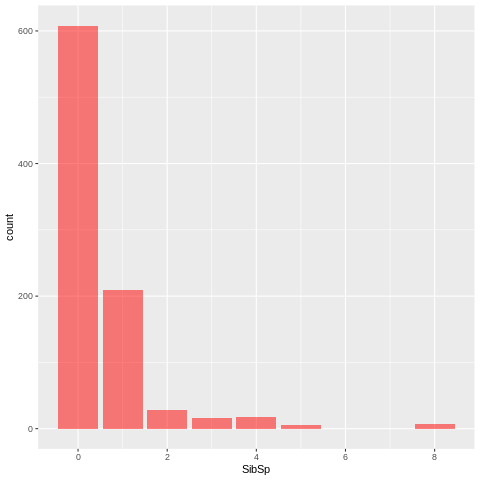

In [82]:
%%R
# distribuição de outra variável
ggplot(dados_treino,aes(SibSp)) + geom_bar(fill = 'red', alpha = 0.5)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



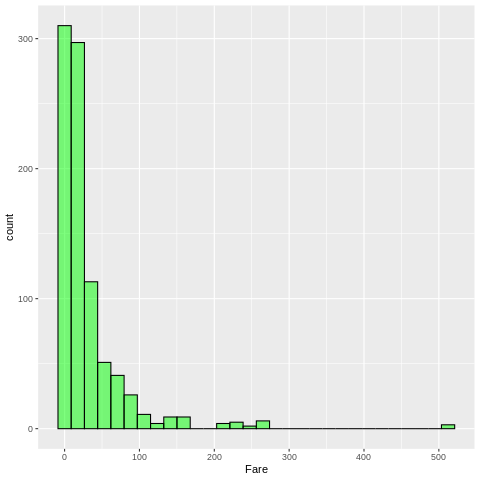

In [83]:
%%R
# preço do ticket para o navio
ggplot(dados_treino,aes(Fare)) + geom_histogram(fill = 'green', color = 'black', alpha = 0.5)

## Pré Processamento - Limpando dados
- Para tratar os dados missing, usaremos o recurso de imputation.
- Essa técnica visa substituir os valores missing por outros valores a média da variável ou **outra** qualquer

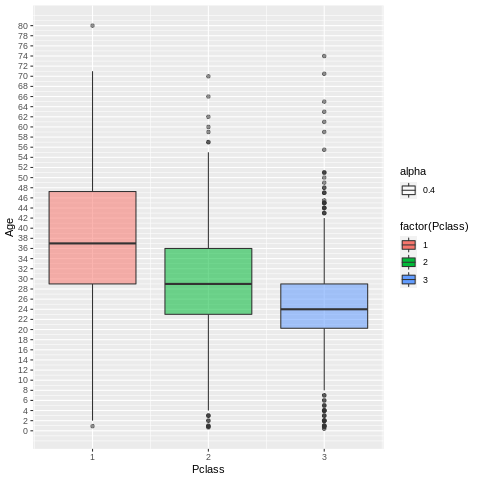

In [85]:
%%R
# Por exemplo, vamos verificar as idades por classe de passageiro (baixa, média, alta):
pl <- ggplot(dados_treino, aes(Pclass,Age)) + geom_boxplot(aes(group = Pclass, fill = factor(Pclass), alpha = 0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

## Imputation para "Age" 

Vimos que os passageiros mais ricos, nas classes mais altas, tendem a ser mais velhos. 

Usaremos esta média para imputar as idades Missing

In [0]:
%%R
impute_age <- function(age, class){ #parâmetro age e class
  out <- age #colocar a varíavel idade em out
  #iniciando verificação
  for (i in 1:length(age)){ #variável i(contador), até o comprimento da variável idade
    
    if (is.na(age[i])){         # se valores forem .na
      
      if (class[i] == 1){       # e classe igual a 1
        out[i] <- 37            # imputar valor 37
        

      }else if (class[i] == 2){ # se classe 2
        out[i] <- 29            # imputar 29
        
      }else{
        out[i] <- 24            # caso contrário 24
      }
    }else{
      out[i]<-age[i]          
    }
  }
  return(out)
}


## Ajustando valores NA com a saída do Loop anterior

In [0]:
%%R
# os valores imputados são a média de idade para cada classe
fixed.ages <- impute_age(dados_treino$Age, dados_treino$Pclass)
dados_treino$Age <- fixed.ages

## Visualizando mapa de valores missing (não existem mais dados missing)

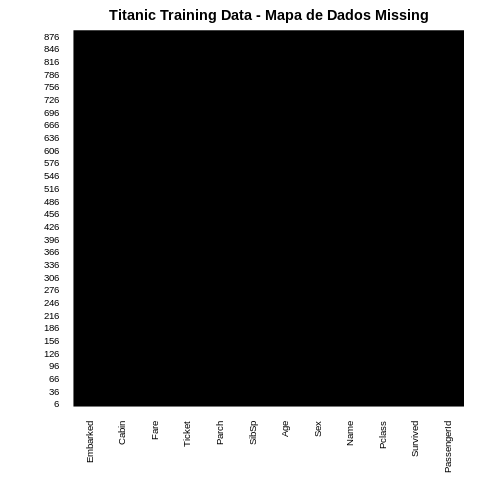

In [96]:
%%R
missmap(dados_treino, 
        main = "Titanic Training Data - Mapa de Dados Missing", 
        col = c("yellow", "black"), 
        legend = FALSE)


## Construindo Modelo

##Limpando dados

In [97]:
%%R
str(dados_treino)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [98]:
%%R
head(dados_treino, 3)

  PassengerId Survived Pclass
1           1        0      3
2           2        1      1
3           3        1      3
                                                 Name    Sex Age SibSp Parch
1                             Braund, Mr. Owen Harris   male  22     1     0
2 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female  38     1     0
3                              Heikkinen, Miss. Laina female  26     0     0
            Ticket    Fare Cabin Embarked
1        A/5 21171  7.2500              S
2         PC 17599 71.2833   C85        C
3 STON/O2. 3101282  7.9250              S


In [0]:
%%R
library(dplyr)

Função para buscar do dasaset Treino todas as variáveis, exceto :

PassengerId, name, Ticket e Cabin

## Instrução select {dplyr}

In [0]:
%%R
dados_treino <- select(dados_treino, -PassengerId, -Name, -Ticket, -Cabin)
# removemos quatro variáveis que não desejamos usar

In [101]:
%%R
head(dados_treino, 3)

  Survived Pclass    Sex Age SibSp Parch    Fare Embarked
1        0      3   male  22     1     0  7.2500        S
2        1      1 female  38     1     0 71.2833        C
3        1      3 female  26     0     0  7.9250        S


In [102]:
%%R
str(dados_treino)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


## Treinar modelo com regressão logística e realizar Previsões

In [0]:
%%R 
#função glm para regressão logística - Classificação
log.model <- glm(formula = Survived ~ . , family = binomial(link = 'logit'), data = dados_treino)

In [104]:
%%R
# Podemos ver que as variáveis Sex, Age e Pclass sao as variaveis mais significantes
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = dados_treino)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7042  -0.5827  -0.4091   0.6155   2.4857  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.834756 608.512907   0.029    0.977    
Pclass       -1.180084   0.149468  -7.895 2.90e-15 ***
Sexmale      -2.726743   0.201674 -13.521  < 2e-16 ***
Age          -0.043023   0.008183  -5.258 1.46e-07 ***
SibSp        -0.339563   0.109873  -3.091    0.002 ** 
Parch        -0.087203   0.119571  -0.729    0.466    
Fare          0.001743   0.002370   0.735    0.462    
EmbarkedC   -12.298188 608.512689  -0.020    0.984    
EmbarkedQ   -12.416528 608.512744  -0.020    0.984    
EmbarkedS   -12.688564 608.512673  -0.021    0.983    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees 

## Previsões em Dados de Teste

In [0]:
%%R
install.packages("caTools")
library(caTools)

## Split de Dados para criar variável de Indexação 

In [0]:
%%R
split = sample.split(dados_treino$Survived, SplitRatio = 0.70)

## Divisão dos Datasets de treino e de teste

In [0]:
%%R
dados_treino_final = subset(dados_treino, split == TRUE)
dados_teste_final = subset(dados_treino, split == FALSE)

## Gerar Modelo com verão final do dataset

In [0]:
%%R 
# criar versão do modelo
final.log.model <- glm(formula = Survived ~ . , family = binomial(link='logit'), data = dados_treino_final)

##**Resumir o Modelo**

In [117]:
%%R
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = dados_treino_final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5520  -0.6367  -0.4132   0.6417   2.4228  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.453726 612.926160   0.028 0.977282    
Pclass       -1.136836   0.171943  -6.612  3.8e-11 ***
Sexmale      -2.683597   0.240155 -11.174  < 2e-16 ***
Age          -0.035578   0.009486  -3.751 0.000176 ***
SibSp        -0.325675   0.128451  -2.535 0.011232 *  
Parch        -0.104001   0.131918  -0.788 0.430480    
Fare          0.001002   0.002462   0.407 0.684060    
EmbarkedC   -12.083569 612.925905  -0.020 0.984271    
EmbarkedQ   -12.657372 612.925977  -0.021 0.983524    
EmbarkedS   -12.646979 612.925877  -0.021 0.983538    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 829.6  on 622  degr

## Prever Acurácia com predict()

In [0]:
%%R
fitted.probabilities <- predict(final.log.model, newdata = dados_teste_final, type = 'response')

## Calcular Valores

In [0]:
%%R 
fitted.results <- ifelse(fitted.probabilities > 0.5, 1, 0)

## Verificar Acurácia

In [120]:
%%R
# Conseguimos quase 80% de acurácia
misClasificError <- mean(fitted.results != dados_teste_final$Survived)
print(paste('Acuracia', 1-misClasificError))


[1] "Acuracia 0.813432835820896"


## Criando a Matriz de Confusão

In [121]:
%%R
table(dados_teste_final$Survived, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0   144   21
  1    29   74
